In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd

import os 
os.chdir('../')
from utils import cv_utils

import torchsummary
import torch
import yaml 

pd.set_option('mode.chained_assignment', None)
%load_ext autoreload
%autoreload 2

In [2]:
config = "/configs/config.yaml"
model_config = "/configs/cv_configs/convnext_small.yaml"

iso_code = "VCT"
target = "roof_material"
mode = "aerial"

In [45]:
# Get current working directory
cwd = os.getcwd()

# Load main config and model-specific config, and merge them
with open(cwd+config, 'r') as stream:
    c = yaml.safe_load(stream)
with open(cwd+model_config, 'r') as stream:
    c.update(yaml.safe_load(stream))
    
c["iso_code"] = iso_code
c["target"] = target
c["mode"] = mode

#c['path_to_images'] = c['path_to_images'].format(mode=mode, iso_code=iso_code)
#c['path_to_file'] = c['path_to_file'].format(mode=mode, iso_code=iso_code)

In [74]:
data, data_loader, classes = cv_utils.load_dataset(config=c, phases=["train", "test"])

INFO:root:{'incomplete': 0, 'concrete/cement': 1, 'healthy_metal': 2, 'irregular_metal': 3}
INFO:root: Classes: ['incomplete', 'concrete/cement', 'healthy_metal', 'irregular_metal']


In [75]:
classes

['incomplete', 'concrete/cement', 'healthy_metal', 'irregular_metal']

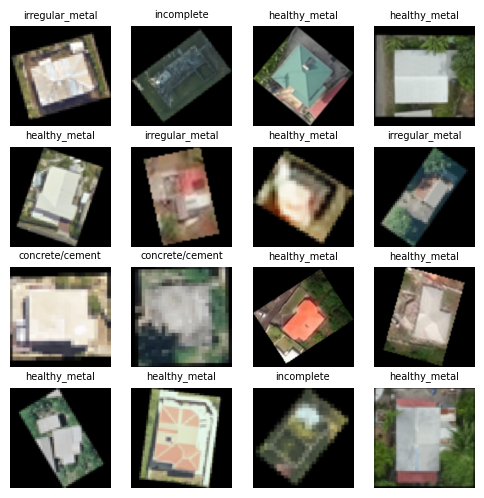

In [125]:
cv_utils.visualize_data(data, data_loader, phase='train', normalize=c["normalize"])